# Linear Regression

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [467]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [468]:
# constants (model will try to predict these values)
N = 100
m = 0.5
b = -2

In [469]:
# generate random data of size N
X = np.random.random(N) * 10 - 5
Y = m * X + b + np.random.randn(N) # Gaussian noise added to the Y values
# Y = m * X + b

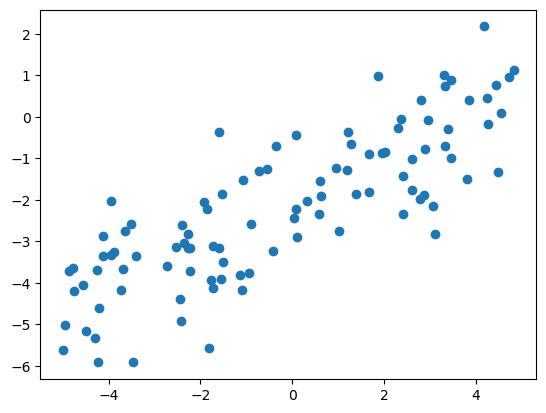

In [470]:
# plot the data
f = plt.scatter(X, Y)

In [471]:
# create a linear regression model
model = nn.Linear(1, 1)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [474]:
# reshape the data to be `num_samples` by `num_dimensions`
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# cast the data type to float32 (PyTorch uses float32 by default; numpy uses float64)
inputs = torch.from_numpy(X.astype(np.float32)) # X = torch.from_numpy(X).type(torch.FloatTensor)
target = torch.from_numpy(Y.astype(np.float32)) # Y = torch.from_numpy(Y).type(torch.FloatTensor)

In [475]:
print("INPUTS:", type(inputs))
print("TARGET:", type(target))

INPUTS: <class 'torch.Tensor'>
TARGET: <class 'torch.Tensor'>


An example of `reshape` is shown below. It changes the dimensions of an array.

In [482]:
arr = np.random.random(10) * 100 - 50
print("ARRAY:", arr)

ARRAY: [-23.57597631  -1.19996139 -39.2529796   44.45018585 -47.62632419
 -31.27423395  16.69321926   5.45569221  23.56268562  -0.91999504]


In [484]:
# reshape to 2 rows by 5 columns
print(arr.reshape(2, 5))

[[-23.57597631  -1.19996139 -39.2529796   44.45018585 -47.62632419]
 [-31.27423395  16.69321926   5.45569221  23.56268562  -0.91999504]]


Both `inputs` and `target` variables are of type `torch.Tensor`.

In [477]:
# train the model
num_epochs = 1000
losses = []
for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # store losses in an array for plotting
    losses.append(loss.item())

    # backward pass
    loss.backward()
    optimizer.step()

    # store gradients in an array for plotting
    w = model.weight.data.numpy()
    b = model.bias.data.numpy()
    print(f'Epoch {it + 1}/{num_epochs}, Loss: {loss.item():.4f}, Weight: {w}, Bias: {b}')

Epoch 1/1000, Loss: 18.3700, Weight: [[-0.28100047]], Bias: [0.69918424]
Epoch 2/1000, Loss: 15.0485, Weight: [[-0.13248047]], Bias: [0.6400676]
Epoch 3/1000, Loss: 12.6914, Weight: [[-0.00988532]], Bias: [0.5828485]
Epoch 4/1000, Loss: 10.9974, Weight: [[0.09126978]], Bias: [0.5273642]
Epoch 5/1000, Loss: 9.7604, Weight: [[0.17469448]], Bias: [0.4734767]
Epoch 6/1000, Loss: 8.8392, Weight: [[0.24345747]], Bias: [0.42106873]
Epoch 7/1000, Loss: 8.1370, Weight: [[0.300097]], Bias: [0.37004006]
Epoch 8/1000, Loss: 7.5875, Weight: [[0.34671268]], Bias: [0.32030472]
Epoch 9/1000, Loss: 7.1452, Weight: [[0.3850412]], Bias: [0.2717886]
Epoch 10/1000, Loss: 6.7788, Weight: [[0.41651917]], Bias: [0.22442737]
Epoch 11/1000, Loss: 6.4669, Weight: [[0.44233477]], Bias: [0.17816496]
Epoch 12/1000, Loss: 6.1947, Weight: [[0.46347085]], Bias: [0.13295211]
Epoch 13/1000, Loss: 5.9520, Weight: [[0.4807403]], Bias: [0.0887453]
Epoch 14/1000, Loss: 5.7316, Weight: [[0.4948155]], Bias: [0.0455058]
Epoch 

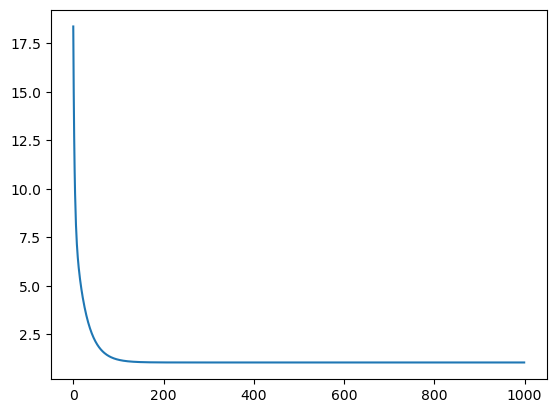

In [478]:
# plot the loss
plt.plot(losses)

A decreasing (fast start, slow end) curve is **ideal** when training machine learning models. 

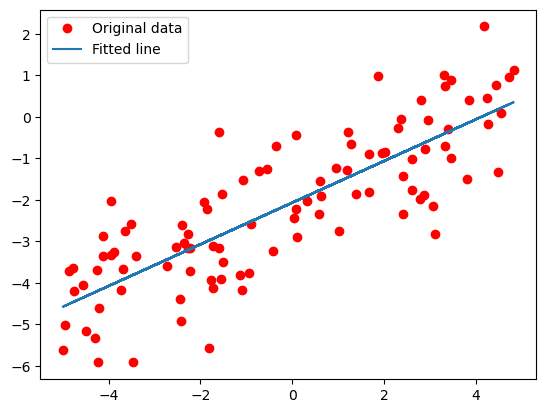

In [479]:
# prediction and plot
predicted = model(inputs).detach().numpy() # detach the tensor
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

Alternative way to make predictions without gradients is shown below.

In [480]:
with torch.no_grad():
    out = model(inputs).numpy()
print(out, type(out))

[[-4.1868935 ]
 [-4.5767565 ]
 [-4.5056825 ]
 [ 0.35164762]
 [-1.5557752 ]
 [-2.0317523 ]
 [-1.5897783 ]
 [-1.0924015 ]
 [-1.1346118 ]
 [-0.62448156]
 [ 0.21758556]
 [-3.7726433 ]
 [-4.202571  ]
 [-3.2839198 ]
 [-4.2236605 ]
 [ 0.05740213]
 [-4.448954  ]
 [-0.33687162]
 [-1.7494404 ]
 [-2.8387444 ]
 [-1.2295098 ]
 [-0.40851104]
 [-4.3186426 ]
 [-1.7721057 ]
 [-2.8643458 ]
 [-3.4331627 ]
 [-2.8300166 ]
 [-4.177047  ]
 [-3.8937888 ]
 [-0.40065515]
 [-1.230936  ]
 [-1.4562998 ]
 [ 0.299721  ]
 [-1.3760335 ]
 [-2.977384  ]
 [-0.5251857 ]
 [-0.760273  ]
 [-4.015444  ]
 [-3.270599  ]
 [-0.13724267]
 [-2.998363  ]
 [-2.9400566 ]
 [-3.8067746 ]
 [-3.2087684 ]
 [-2.5413017 ]
 [-2.9561605 ]
 [-0.85312486]
 [-3.3360405 ]
 [-4.360111  ]
 [-0.66026306]
 [-0.5047957 ]
 [-0.6769748 ]
 [-2.6035612 ]
 [-2.432065  ]
 [-2.852749  ]
 [-0.16268134]
 [-0.32902825]
 [-2.5218685 ]
 [-2.276156  ]
 [-0.8574859 ]
 [-3.299905  ]
 [-2.0300863 ]
 [-0.36364245]
 [-0.6140028 ]
 [ 0.06576133]
 [-2.6359203 ]
 [-4.55766

Inspect the parameters of the model to see if they match the original settings.
- slope `m` $\rightarrow$ weight `w`
- intercept `b` $\rightarrow$ bias `b`

In this example, the original weight and bias is already known.

In [481]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.50210536]] [-2.0680795]
